# GAME OF WAR


## Creadores

Enrique Ruiz Ruiz y Sergio Morante Mur

## Librerías

In [1]:
import numpy as np # Se importa numpuy
import matplotlib.pyplot as plt # Se importa matplotlib
from matplotlib import colors # Se importa colors
import random # Se importa random
import time # Se importa time

## Variables globales


In [2]:
AZUL = (27, 167, 249) # Color Azul
ROJO = (237, 70, 70) # Color Rojo
NEGRO = (0, 0, 0) # Color Negro

TAM_TABLERO = (10, 10) # Tamaño tablero


## Numba

In [3]:
from numba import jit, set_num_threads



## Funciones

In [4]:
'''
Definición: Se genera una matriz que representará el tablero de juego
Entradas: El tamaño del tablero (matriz)
Salidas: El tablero terminado y relleno (matriz inicializada)
'''
def generar_tablero(TAM_TABLERO):
    tablero = np.zeros(TAM_TABLERO) # Se hace el tablero entero de 0
    
    # Se rellena de 1 la mitad
    for i in range(TAM_TABLERO[0]//2):
        for j in range(TAM_TABLERO[1]):
            tablero[i][j] = 1

    return tablero # Se devuelve tablero


'''
Definición: Función que permite ver el tablero para conocer su funcionamiento
Entradas: Tablero
Salidas: Visualización del tablero
'''
def ver_tablero(tablero):
    plt.figure(figsize=(10,10)) # Tamaño figura
    plt.title("Game of War",size=28) # Título de la tabla
    colormap = colors.ListedColormap(["firebrick","cornflowerblue"]) # Colores
    plt.imshow(tablero, cmap=colormap) # Se elije que ver
    plt.show() # Ver tabla


'''
Definición: Función que encuentra el conflicto y da paso a la función conflicto
Entradas: tablero
Salidas: lugar de conflicto, si no hay conflicto devuelve fin
'''
def detectar_conflicto(tablero):
    aux = tablero

    for i in range(TAM_TABLERO[0]-1):
        for j in range(TAM_TABLERO[1]-1):
            # Si encuentra un enemigo a su alrededor (arriba, abajo, derecha e izquierda)
            if(tablero[i][j] != tablero[i+1][j] or tablero[i][j] != tablero[i][j-1] or tablero[i][j] != tablero[i][j+1] or tablero[i][j] != tablero[i-1][j]):
                # Si hay un conflicto se realiza
                aux = conflicto(tablero, i, j)
    
    return aux


'''
Definición: Función que calcula quien gana y quien pierde
Entradas: lugar de conflicto
Salidas: perdedor
'''
def calculo_ganador(tablero, i, j):
    perdedor = (0, 0)
    # contador de enemigos colindantes
    enemigo = 0
    
    # calculo probabilidades
    if(tablero[i][j] != tablero[i+1][j]):
        # si se suma 1 es que i+1 es enemigo
        enemigo = enemigo + 1
    if(tablero[i][j] != tablero[i][j-1]):
        # si se suma 10 es que j-1 es enemigo
        enemigo = enemigo + 10
    if(tablero[i][j] != tablero[i][j+1]):
        # si se suma 100 es que j+1 es enemigo
        enemigo = enemigo + 100
    if(tablero[i][j] != tablero[i-1][j]):
        # si se suma 1000 es que i-1 es enemigo
        enemigo = enemigo + 1000
    
    # si solo hay un enemigo, 50%
    if(enemigo == 1 or enemigo == 10 or enemigo == 100 or enemigo == 1000):
        # valor random entre 0 y 1
        valor = random.randint(0, 1)
        # 0 pierde [i, j]
        if(valor == 0):
            perdedor = (i, j)
        # 1 pierde el cuadrado enemigo a [i, j]
        else:
            if(enemigo == 1):
                perdedor = (i+1, j)
            elif(enemigo == 10):
                perdedor = (i, j-1)
            elif(enemigo == 100):
                perdedor = (i, j+1)
            else:
                perdedor = (i-1, j)

    # si hay dos enemigos, 66% contra 33%
    elif(enemigo == 11 or enemigo == 101 or enemigo == 1001 or enemigo == 110 or enemigo == 1010 or enemigo == 1100):
        #valor random entre 1 y 17
        valor = random.randint(1, 17)
        # valor >= 7 pierde [i, j]
        if(valor >= 7):
            perdedor = (i, j)
        # 4 >= valor <= 6 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 4 and valor <= 6):
            if(enemigo == 11):
                perdedor = (i+1, j)
            elif(enemigo == 101):
                perdedor = (i+1, j)
            elif(enemigo == 1001):
                perdedor = (i+1, j)
            elif(enemigo == 110):
                perdedor = (i, j-1)
            elif(enemigo == 1010):
                perdedor = (i, j-1)
            else:
                perdedor = (i, j+1)
        # valor <= 4 pierde el cuadrado enemigo a [i, j]
        else:
            if(enemigo == 11):
                perdedor = (i, j-1)
            elif(enemigo == 101):
                perdedor = (i, j+1)
            elif(enemigo == 1001):
                perdedor = (i-1, j)
            elif(enemigo == 110):
                perdedor = (i, j+1)
            elif(enemigo == 1010):
                perdedor = (i-1, j)
            else:
                perdedor = (i-1, j)

    # si hay tres enemigos, 75% contra 25%
    elif(enemigo == 111 or enemigo == 1011 or enemigo == 1101 or enemigo == 1110):
        #valor random entre 1 y 48
        valor = random.randint(0, 48)
        # valor >= 13 pierde [i, j]
        if(valor >= 13):
            perdedor = (i, j)
        # 9 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 9 and valor <= 12):
            if(enemigo == 111):
                perdedor = (i+1, j)
            if(enemigo == 1011):
                perdedor = (i+1, j)
            if(enemigo == 1101):
                perdedor = (i+1, j)
            else:
                perdedor = (i, j+1)
        # 5 >= valor <= 8 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 5 and valor <= 8):
            if(enemigo == 111):
                perdedor = (i, j+1)
            if(enemigo == 1011):
                perdedor = (i, j+1)
            if(enemigo == 1101):
                perdedor = (i, j-1)
            else:
                perdedor = (i, j-1)
        # 1 >= valor <= 4 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 1 and valor <= 4):
            if(enemigo == 111):
                perdedor = (i, j-1)
            if(enemigo == 1011):
                perdedor = (i-1, j)
            if(enemigo == 1101):
                perdedor = (i-1, j)
            else:
                perdedor = (i-1, j)

    # si hay cuatro enemigos, 80% contra 20%
    else:
        #valor random entre 1 y 48
        valor = random.randint(0, 48)
        # valor >= 13 pierde [i, j]
        if(valor >= 13):
            perdedor = (i, j)
        # 10 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 10 and valor <= 12):
            perdedor = (i+1, j)
        # 10 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 10 and valor <= 12):
            perdedor = (i, j+1)
        # 10 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 10 and valor <= 12):
            perdedor = (i, j-1)
        else:
            perdedor = (i-1, j)

    return perdedor


'''
Definición: Función que realiza el conflicto mediante probabilidades
Entradas: lugar de conflicto
Salidas: 
'''
def conflicto(tablero, i, j):
    # Se actualiza el tablero tras un conflicto
    perd = calculo_ganador(tablero, i, j)
    new_tab = cambio_color(tablero, perd)
    
    return new_tab


'''
Definición: Función que cambia de color al perdedor
Entradas: Tablero y perdedor
Salidas: Tablero actualizado
'''
def cambio_color(tablero, perdedor):
    # Se cambia el color de una posición concreta

    if (tablero[perdedor[0], perdedor[1]] == 1):
        tablero[perdedor[0], perdedor[1]] = 0
    else:
        tablero[perdedor[0], perdedor[1]] = 1
    
    return tablero


'''
Definición: Función que comprueba si toda la matriz es de un color
Entradas: Lugar de conflicto
Salidas: condición de terminación
'''
def comprobar_final(tablero):
    # Se comprueba si no hay más conflictos en el tablero
    for i in range(TAM_TABLERO[0]-1):
        for j in range(TAM_TABLERO[1]-1):
            if(tablero[i][j] != tablero[i+1][j] or tablero[i][j] != tablero[i][j-1] or tablero[i][j] != tablero[i][j+1] or tablero[i][j] != tablero[i-1][j]):
                return False
            
    return True


'''
Definición: Función que comprueba que equipo ha ganado
Entradas: Tablero
Salidas: 1 o 0
'''
def quien_gana(tablero):
    aux = np.zeros(TAM_TABLERO)

    # Se comrueba quien gana o pierde
    if ((aux + tablero).any()):
        return 0
    else:
        return 1


'''
Definición: Función que contiene todo el programa principal
Entradas: -
Salidas: Gandor de la batalla
'''
def batalla(TAM_TABLERO):
    tam_t = TAM_TABLERO
    tablero = generar_tablero(tam_t) # Se genera tablero
    terminado = False # Se inicializa la condición de terminación
    ver = 0 # Variable para elegir cada cuanto ver el tablero

    while (terminado == False):
        tablero = detectar_conflicto(tablero) # Actualización del tablero
        
        # Si han pasado 10 iteracicones
        if ver == 10:
            # ver_tablero(tablero) # Visualización del tablero
            ver = 0 # Se resetea
        else:
            ver = ver + 1 # Se suma una vuelta

        terminado = comprobar_final(tablero) # Se comprueba si se finaliza

    return  quien_gana(tablero)# Devolución de ganador

'''
Definición: Calcular el tiempo de una batalla
Entradas: tamaño del tablero 
Salidas: tiempo de ejecución
'''
def calcular_tiempo_ejecucion(tam):
    r = 0
    inicio = time.time() # Se inicializa el tiempo
    r = batalla(tam) # Ocurre la batalla
    fin = time.time() # Sefinaliza el tiempo

    return fin-inicio # Se calcula la didferencia de tiempo

# Cálculo de tiempos y gráficas

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


0
1
2
3
4
5
6
7
8
9


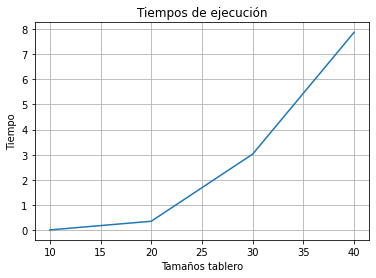

In [5]:
set_num_threads(1)
# 10 batallas de tablero 10x10, 50x50, 100x100 y 200x200
t_1 = 0
t_2 = 0
t_3 = 0
t_4 = 0

for i in range(0, 10):
  print(i)
  # Se ejecuta con tablero 10x10
  TAM_TABLERO = (10, 10)
  t_1 = t_1 + calcular_tiempo_ejecucion((10, 10))

  # Se ejeucta con tablero 50x50
  TAM_TABLERO = (20, 20)
  t_2 = t_2 + calcular_tiempo_ejecucion((20, 20))

  # Se ejecuta con tablero 100x100
  TAM_TABLERO = (30, 30)
  t_3 = t_3 + calcular_tiempo_ejecucion((30, 30))

  # Se ejecuta con tablero 200x200
  TAM_TABLERO = (40, 40)
  t_4 = t_4 + calcular_tiempo_ejecucion((40, 40))

# Visualización de la evolución de los tiempos
x = [10, 20, 30, 40]
y = [t_1/10, t_2/10, t_3/10, t_4/10]

plt.plot(x, y)
plt.xlabel('Tamaños tablero')
plt.ylabel('Tiempo')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()



# Otro

In [6]:
'''
Definición: Se genera una matriz que representará el tablero de juego
Entradas: El tamaño del tablero (matriz)
Salidas: El tablero terminado y relleno (matriz inicializada)
'''
def generar_tablero(TAM_TABLERO):
    tablero = np.zeros(TAM_TABLERO) # Se hace el tablero entero de 0
    
    # Se rellena de 1 la mitad
    for i in range(TAM_TABLERO[0]//2):
        for j in range(TAM_TABLERO[1]):
            tablero[i][j] = 1

    return tablero # Se devuelve tablero


'''
Definición: Función que permite ver el tablero para conocer su funcionamiento
Entradas: Tablero
Salidas: Visualización del tablero
'''
def ver_tablero(tablero):
    plt.figure(figsize=(10,10)) # Tamaño figura
    plt.title("Game of War",size=28) # Título de la tabla
    colormap = colors.ListedColormap(["firebrick","cornflowerblue"]) # Colores
    plt.imshow(tablero, cmap=colormap) # Se elije que ver
    plt.show() # Ver tabla


'''
Definición: Función que encuentra el conflicto y da paso a la función conflicto
Entradas: tablero
Salidas: lugar de conflicto, si no hay conflicto devuelve fin
'''
def detectar_conflicto(tablero):
    aux = tablero

    for i in range(TAM_TABLERO[0]-1):
        for j in range(TAM_TABLERO[1]-1):
            # Si encuentra un enemigo a su alrededor (arriba, abajo, derecha e izquierda)
            if(tablero[i][j] != tablero[i+1][j] or tablero[i][j] != tablero[i][j-1] or tablero[i][j] != tablero[i][j+1] or tablero[i][j] != tablero[i-1][j]):
                # Si hay un conflicto se realiza
                aux = conflicto(tablero, i, j)
    
    return aux


'''
Definición: Función que calcula quien gana y quien pierde
Entradas: lugar de conflicto
Salidas: perdedor
'''
@jit(nopython=True)
def calculo_ganador(tablero, i, j):
    perdedor = (0, 0)
    # contador de enemigos colindantes
    enemigo = 0
    
    # calculo probabilidades
    if(tablero[i][j] != tablero[i+1][j]):
        # si se suma 1 es que i+1 es enemigo
        enemigo = enemigo + 1
    if(tablero[i][j] != tablero[i][j-1]):
        # si se suma 10 es que j-1 es enemigo
        enemigo = enemigo + 10
    if(tablero[i][j] != tablero[i][j+1]):
        # si se suma 100 es que j+1 es enemigo
        enemigo = enemigo + 100
    if(tablero[i][j] != tablero[i-1][j]):
        # si se suma 1000 es que i-1 es enemigo
        enemigo = enemigo + 1000
    
    # si solo hay un enemigo, 50%
    if(enemigo == 1 or enemigo == 10 or enemigo == 100 or enemigo == 1000):
        # valor random entre 0 y 1
        valor = random.randint(0, 1)
        # 0 pierde [i, j]
        if(valor == 0):
            perdedor = (i, j)
        # 1 pierde el cuadrado enemigo a [i, j]
        else:
            if(enemigo == 1):
                perdedor = (i+1, j)
            elif(enemigo == 10):
                perdedor = (i, j-1)
            elif(enemigo == 100):
                perdedor = (i, j+1)
            else:
                perdedor = (i-1, j)

    # si hay dos enemigos, 66% contra 33%
    elif(enemigo == 11 or enemigo == 101 or enemigo == 1001 or enemigo == 110 or enemigo == 1010 or enemigo == 1100):
        #valor random entre 1 y 17
        valor = random.randint(1, 17)
        # valor >= 7 pierde [i, j]
        if(valor >= 7):
            perdedor = (i, j)
        # 4 >= valor <= 6 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 4 and valor <= 6):
            if(enemigo == 11):
                perdedor = (i+1, j)
            elif(enemigo == 101):
                perdedor = (i+1, j)
            elif(enemigo == 1001):
                perdedor = (i+1, j)
            elif(enemigo == 110):
                perdedor = (i, j-1)
            elif(enemigo == 1010):
                perdedor = (i, j-1)
            else:
                perdedor = (i, j+1)
        # valor <= 4 pierde el cuadrado enemigo a [i, j]
        else:
            if(enemigo == 11):
                perdedor = (i, j-1)
            elif(enemigo == 101):
                perdedor = (i, j+1)
            elif(enemigo == 1001):
                perdedor = (i-1, j)
            elif(enemigo == 110):
                perdedor = (i, j+1)
            elif(enemigo == 1010):
                perdedor = (i-1, j)
            else:
                perdedor = (i-1, j)

    # si hay tres enemigos, 75% contra 25%
    elif(enemigo == 111 or enemigo == 1011 or enemigo == 1101 or enemigo == 1110):
        #valor random entre 1 y 48
        valor = random.randint(0, 48)
        # valor >= 13 pierde [i, j]
        if(valor >= 13):
            perdedor = (i, j)
        # 9 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 9 and valor <= 12):
            if(enemigo == 111):
                perdedor = (i+1, j)
            if(enemigo == 1011):
                perdedor = (i+1, j)
            if(enemigo == 1101):
                perdedor = (i+1, j)
            else:
                perdedor = (i, j+1)
        # 5 >= valor <= 8 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 5 and valor <= 8):
            if(enemigo == 111):
                perdedor = (i, j+1)
            if(enemigo == 1011):
                perdedor = (i, j+1)
            if(enemigo == 1101):
                perdedor = (i, j-1)
            else:
                perdedor = (i, j-1)
        # 1 >= valor <= 4 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 1 and valor <= 4):
            if(enemigo == 111):
                perdedor = (i, j-1)
            if(enemigo == 1011):
                perdedor = (i-1, j)
            if(enemigo == 1101):
                perdedor = (i-1, j)
            else:
                perdedor = (i-1, j)

    # si hay cuatro enemigos, 80% contra 20%
    else:
        #valor random entre 1 y 48
        valor = random.randint(0, 48)
        # valor >= 13 pierde [i, j]
        if(valor >= 13):
            perdedor = (i, j)
        # 10 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 10 and valor <= 12):
            perdedor = (i+1, j)
        # 10 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 10 and valor <= 12):
            perdedor = (i, j+1)
        # 10 >= valor <= 12 pierde el cuadrado enemigo a [i, j]
        elif(valor >= 10 and valor <= 12):
            perdedor = (i, j-1)
        else:
            perdedor = (i-1, j)

    return perdedor


'''
Definición: Función que realiza el conflicto mediante probabilidades
Entradas: lugar de conflicto
Salidas: 
'''
def conflicto(tablero, i, j):
    # Se actualiza el tablero tras un conflicto
    perd = calculo_ganador(tablero, i, j)
    new_tab = cambio_color(tablero, perd)
    
    return new_tab


'''
Definición: Función que cambia de color al perdedor
Entradas: Tablero y perdedor
Salidas: Tablero actualizado
'''
def cambio_color(tablero, perdedor):
    # Se cambia el color de una posición concreta

    if (tablero[perdedor[0], perdedor[1]] == 1):
        tablero[perdedor[0], perdedor[1]] = 0
    else:
        tablero[perdedor[0], perdedor[1]] = 1
    
    return tablero


'''
Definición: Función que comprueba si toda la matriz es de un color
Entradas: Lugar de conflicto
Salidas: condición de terminación
'''
def comprobar_final(tablero):
    # Se comprueba si no hay más conflictos en el tablero
    for i in range(TAM_TABLERO[0]-1):
        for j in range(TAM_TABLERO[1]-1):
            if(tablero[i][j] != tablero[i+1][j] or tablero[i][j] != tablero[i][j-1] or tablero[i][j] != tablero[i][j+1] or tablero[i][j] != tablero[i-1][j]):
                return False
            
    return True


'''
Definición: Función que comprueba que equipo ha ganado
Entradas: Tablero
Salidas: 1 o 0
'''
def quien_gana(tablero):
    aux = np.zeros(TAM_TABLERO)

    # Se comrueba quien gana o pierde
    if ((aux + tablero).any()):
        return 0
    else:
        return 1


'''
Definición: Función que contiene todo el programa principal
Entradas: -
Salidas: Gandor de la batalla
'''
def batalla(TAM_TABLERO):
    tam_t = TAM_TABLERO
    tablero = generar_tablero(tam_t) # Se genera tablero
    terminado = False # Se inicializa la condición de terminación
    ver = 0 # Variable para elegir cada cuanto ver el tablero
    xcv = 0

    while (terminado == False):
        xcv += 1
        tablero = detectar_conflicto(tablero) # Actualización del tablero
        
        # Si han pasado 10 iteracicones
        if ver == 10:
            # ver_tablero(tablero) # Visualización del tablero
            ver = 0 # Se resetea
        else:
            ver = ver + 1 # Se suma una vuelta

        terminado = comprobar_final(tablero) # Se comprueba si se finaliza
        # print('kk' + str(xcv))

    return quien_gana(tablero) # Devolución de ganador

'''
Definición: Calcular el tiempo de una batalla
Entradas: tamaño del tablero 
Salidas: tiempo de ejecución
'''
def calcular_tiempo_ejecucion(tam):
    r = 0
    inicio = time.time() # Se inicializa el tiempo
    r = batalla(tam) # Ocurre la batalla
    fin = time.time() # Sefinaliza el tiempo

    return fin-inicio # Se calcula la didferencia de tiempo

# Ver

0
1
2
3
4
5
6
7
8
9


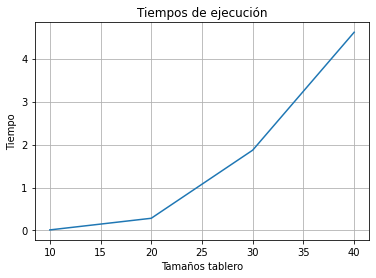

In [12]:
set_num_threads(1)
# 10 batallas de tablero 10x10, 50x50, 100x100 y 200x200
t_1 = 0
t_2 = 0
t_3 = 0
t_4 = 0

for i in range(0, 10):
  print(i)
  # Se ejecuta con tablero 10x10
  TAM_TABLERO = (10, 10)
  t_1 = t_1 + calcular_tiempo_ejecucion((10, 10))

  # Se ejeucta con tablero 50x50
  TAM_TABLERO = (20, 20)
  t_2 = t_2 + calcular_tiempo_ejecucion((20, 20))

  # Se ejecuta con tablero 100x100
  TAM_TABLERO = (30, 30)
  t_3 = t_3 + calcular_tiempo_ejecucion((30, 30))

  # Se ejecuta con tablero 200x200
  TAM_TABLERO = (40, 40)
  t_4 = t_4 + calcular_tiempo_ejecucion((40, 40))

# Visualización de la evolución de los tiempos
# Visualización de la evolución de los tiempos
x = [10, 20, 30, 40]
y = [t_1/10, t_2/10, t_3/10, t_4/10]


plt.plot(x, y)
plt.xlabel('Tamaños tablero')
plt.ylabel('Tiempo')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()



0
1
2
3
4
5
6
7
8
9


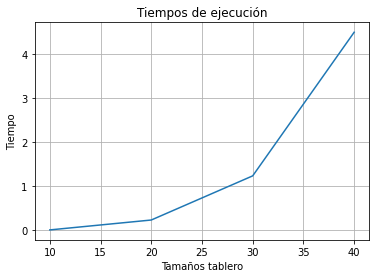

In [11]:
set_num_threads(2)
# 10 batallas de tablero 10x10, 50x50, 100x100 y 200x200
t_1 = 0
t_2 = 0
t_3 = 0
t_4 = 0

for i in range(0, 10):
  print(i)
  # Se ejecuta con tablero 10x10
  TAM_TABLERO = (10, 10)
  t_1 = t_1 + calcular_tiempo_ejecucion((10, 10))

  # Se ejeucta con tablero 50x50
  TAM_TABLERO = (20, 20)
  t_2 = t_2 + calcular_tiempo_ejecucion((20, 20))

  # Se ejecuta con tablero 100x100
  TAM_TABLERO = (30, 30)
  t_3 = t_3 + calcular_tiempo_ejecucion((30, 30))

  # Se ejecuta con tablero 200x200
  TAM_TABLERO = (40, 40)
  t_4 = t_4 + calcular_tiempo_ejecucion((40, 40))

# Visualización de la evolución de los tiempos
x = [10, 20, 30, 40]
y = [t_1/10, t_2/10, t_3/10, t_4/10]

plt.plot(x, y)
plt.xlabel('Tamaños tablero')
plt.ylabel('Tiempo')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()

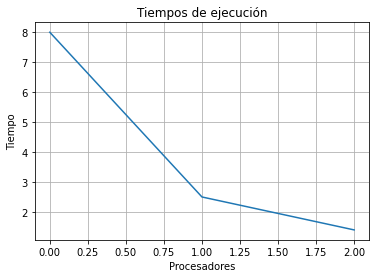

In [9]:
x = [0, 1, 2]
y = [8, 2.5, 1.4]
plt.plot(x, y)
plt.xlabel('Procesadores')
plt.ylabel('Tiempo')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()

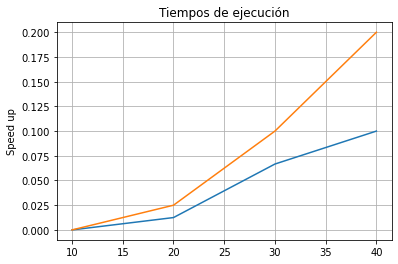

In [21]:
x = [10, 20, 30, 40]
y = [0, 0.25/20, 2/30, 4/40]

x1 = [10, 20, 30, 40]
y1 = [0, 0.5/20, 3/30, 8/40]

plt.plot(x, y)
plt.plot(x1, y1)
plt.ylabel('Speed up')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()

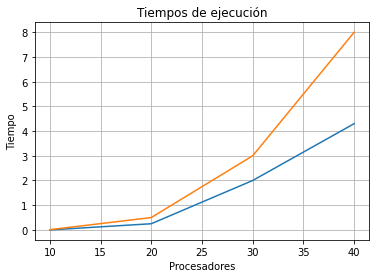

In [17]:
x = [10, 20, 30, 40]
y = [0, 0.25, 2, 4.3]

x1 = [10, 20, 30, 40]
y1 = [0.01, 0.5, 3, 8]

plt.plot(x, y)
plt.plot(x1, y1)
plt.xlabel('Procesadores')
plt.ylabel('Tiempo')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()

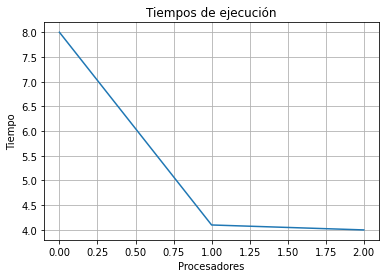

In [23]:
x = [0, 1, 2]
y = [8, 4.1, 4]

plt.plot(x, y)
plt.xlabel('Procesadores')
plt.ylabel('Tiempo')
plt.title('Tiempos de ejecución')
plt.grid()
plt.show()